In [73]:
#!pip install matplotlib
#!pip install windrose openpyxl

     ------------------------------------ 242.1/242.1 kB 424.0 kB/s eta 0:00:00

[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from math import pi

In [3]:
from windrose import WindroseAxes

### Считывание данных из файла


### Что делаль
Во время анализа, я выделил несколько столбцов, которые мог бы убрать из глобальной выборке. Например столбец ff10 содержит 100 значений из 3000 строк.

In [4]:
Weather_csv = pd.read_csv('weather_vladimir.csv', delimiter=',')

In [5]:
Weather_csv

,Date,T,Po,P,Pa,U,DD,Ff,N,WW,...,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss
0,31.12.2021 21:00,-5.7,738.1,754.5,-2.1,93,"Ветер, дующий с юга",3,100%.,Снег непрерывный слабый в срок наблюдения.,...,Высокослоистые непросвечивающие или слоисто-до...,NaN,4.0,-6.7,NaN,NaN,NaN,NaN,NaN,NaN
1,31.12.2021 18:00,-6.3,740.2,756.5,-1.2,93,"Ветер, дующий с юга",2,100%.,Снег непрерывный слабый в срок наблюдения. Ди...,...,Высокослоистые непросвечивающие или слоисто-до...,NaN,2.0,-7.3,Следы осадков,12.0,NaN,NaN,NaN,NaN
2,31.12.2021 15:00,-6.8,741.4,757.9,-1.5,92,"Ветер, дующий с юга",1,100%.,Морось (незамерзающая) или снежные зерна нелив...,...,NaN,NaN,2.0,-7.9,NaN,NaN,NaN,NaN,NaN,NaN
3,31.12.2021 12:00,-7.4,742.9,759.5,-1.2,91,"Ветер, дующий с юга",1,100%.,Морось замерзающая слабая. Диаметр смешанного...,...,NaN,NaN,4.0,-8.6,NaN,NaN,NaN,NaN,NaN,NaN
4,31.12.2021 09:00,-8.3,744.1,760.7,-0.7,90,"Ветер, дующий с юга",1,100%.,Дымка.,...,NaN,NaN,4.0,-9.6,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2913,01.01.2021 12:00,-1.6,749.3,765.6,-0.2,96,"Ветер, дующий с юго-юго-востока",3,100%.,Дымка.,...,NaN,NaN,4.0,-2.2,NaN,NaN,NaN,NaN,NaN,NaN
2914,01.01.2021 09:00,-1.9,749.5,765.8,0.1,96,"Ветер, дующий с юга",2,100%.,Дымка.,...,NaN,NaN,2.0,-2.4,NaN,NaN,NaN,NaN,NaN,NaN
2915,01.01.2021 06:00,-1.9,749.4,765.7,-0.4,96,"Ветер, дующий с юга",3,100%.,Дымка.,...,NaN,NaN,2.0,-2.4,Осадков нет,12.0,NaN,NaN,Ровный слой слежавшегося или мокрого снега пок...,7
2916,01.01.2021 03:00,-2.4,749.8,766.1,-0.3,96,"Ветер, дующий с юго-юго-востока",2,100%.,Дымка.,...,NaN,NaN,2.0,-2.9,NaN,NaN,NaN,NaN,NaN,NaN


# 3 пункт лабораторной работы
## Построение розы ветров
1. Создал резеврный файл с данными, в котором изменил надписи в столбце DD на международный формат 
2. Дальше смотрел разные источники с описанием построения розы ветров

In [6]:
df_test = pd.read_csv("WV_test.csv", delimiter = ',', usecols = ["DD", "Ff"])
Ff_list = df_test["DD"].tolist()
degrees = []
for i in Ff_list:
    if i == "N":
        degrees.append(0)
    elif i == "NNE":
        degrees.append(22.5)
    elif i == "NE":
        degrees.append(45)
    elif i == "ENE":
        degrees.append(67.5)
    elif i == "E":
        degrees.append(90)
    elif i == "ESE":
        degrees.append(112.5)
    elif i == "SE":
        degrees.append(135)
    elif i == "SSE":
        degrees.append(157.5)
    elif i == "S":
        degrees.append(180)
    elif i == "SSW":
        degrees.append(202.5)
    elif i == "SW":
        degrees.append(225)
    elif i == "WSW":
        degrees.append(247.5)
    elif i == "W":
        degrees.append(270)
    elif i == "WNW":
        degrees.append(292.5)
    elif i == "NW":
        degrees.append(315)
    else:
        degrees.append(337.5)

df_test["Dir"] = degrees
df_test

,DD,Ff,Dir
0,S,3,180.0
1,S,2,180.0
2,S,1,180.0
3,S,1,180.0
4,S,1,180.0
...,...,...,...
2913,SSE,3,157.5
2914,S,2,180.0
2915,S,3,180.0
2916,SSE,2,157.5


## Проверка корреляции данных


<AxesSubplot:xlabel='x', ylabel='y'>

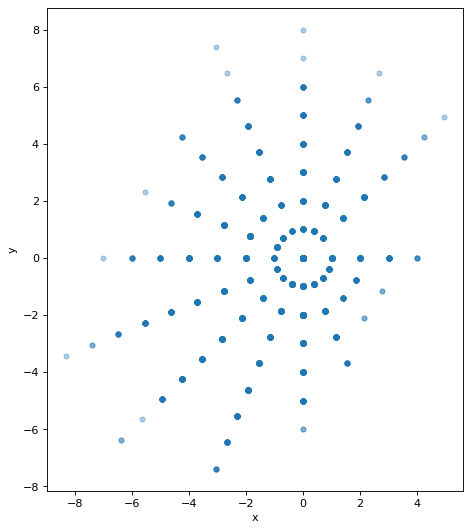

In [7]:
df_test['x'] = df_test['Ff'] * np.sin(df_test['Dir'] * pi / 180.0)
df_test['y'] = df_test['Ff'] * np.cos(df_test['Dir'] * pi / 180.0)
fig, ax = plt.subplots(figsize=(8, 8), dpi = 80)
x0, x1 = ax.get_xlim()
y0, y1 = ax.get_ylim()
ax.set_aspect('equal')
df_test.plot(kind='scatter', x = 'x', y = 'y', alpha = 0.35, ax = ax)

## Построение розы ветров в разных режимах

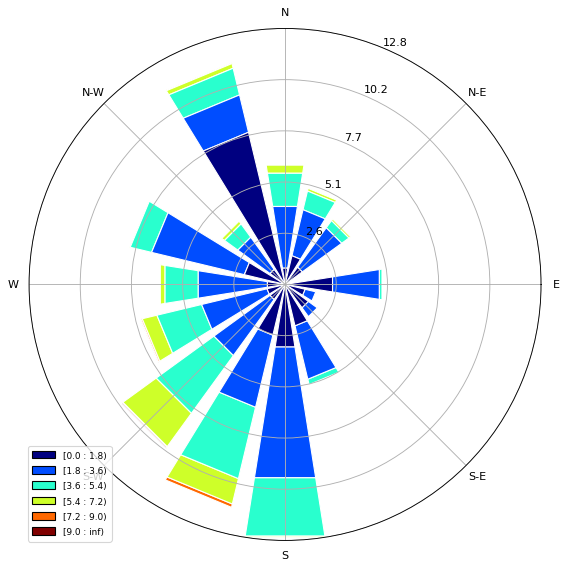

In [8]:
ax = WindroseAxes.from_ax()
ax.bar(df_test.Dir, df_test.Ff, normed=True, opening=0.8, edgecolor = 'white')
ax.set_legend()

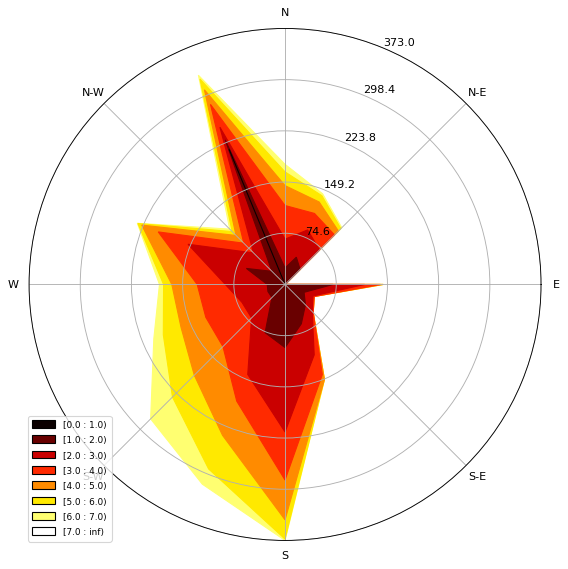

In [9]:
ax = WindroseAxes.from_ax()
ax.contourf(df_test.Dir, df_test.Ff, bins=np.arange(0, 8, 1), cmap = cm.hot)
ax.set_legend()

# 4 пункт лабораторной работы:
Выбранный параметр - T (Температура воздуха)
1. максимальное, минимальное значения;
2. среднее значение;
3. медиану;
4. стандартное отклонение;
5. дисперсию;
6. моду;
7. 10 и 90 перцентиль;
8. 1, 2, 3 квартили

In [10]:
dft = pd.read_csv('weather_vladimir.csv', delimiter=',', usecols = ["T"]) # Выбираем параметр

#### Вычисление максимального и минимального значений

In [11]:
dft.max()

T    35.0
dtype: float64

In [12]:
dft.min()

T   -30.4
dtype: float64

#### Вычисление среднего значения
Порядок вычисления:
1. Суммируем все элементы списка
2. Делим полученное значение на кол-во элементов

In [13]:
temp_list = dft.values.tolist()
all_temp = 0
for temp in temp_list:
    all_temp += temp[0]
res = all_temp / len(temp_list)
round(res, 6)

5.276525

In [14]:
dft.mean()

T    5.276525
dtype: float64

#### Вычиcление медианы
Порядок выполнения:
1. Отсортируем список
2. Найдём серединный элемент

In [15]:
med_temp_list = temp_list.copy()
med_temp_list.sort()
med_temp_list[int(len(med_temp_list)/2)]

[5.5]

In [16]:
dft.median()

T    5.5
dtype: float64

#### Вычисление дисперсии

Для вычисления дисперсии нам надо использовать формулу:
$$ \sigma^2 = \frac{\sum(x-\bar{x})^2} {n-1}  $$

In [17]:
high_sum = 0
for temp in temp_list:
    prom = (round(temp[0], 1) - res) ** 2
    high_sum += prom
variance = high_sum/ (len(temp_list) -1)
round(variance, 6)

165.427879

In [18]:
dft.var()

T    165.427879
dtype: float64

#### Вычисление стандартного отклонения
Для вычисления с.о. необходимо вычислить корень дисперсии

$$ \sigma = \sqrt{\sigma^2} $$

In [19]:
round(variance ** 0.5, 6)

12.861877

In [20]:
dft.std()

T    12.861877
dtype: float64

#### Вычисление моды
Для вычсиления моды нам понадобится:
1. Посчитать кол-во повторений элемента в списке
2. Найти наиболее повторяющееся значение


In [22]:
counts = {}
for temp in temp_list:
    if temp[0] not in counts:
        counts[round(temp[0], 1)] = 1
    else:
        counts[round(temp[0], 1)] += 1

maxim = 0
mode_temp = None
for k, v in counts.items():
    if maxim < v:
        maxim = v
        mode_temp = k

print(mode_temp, maxim)

1.2 17


In [21]:
dft.value_counts()

T    
 0.6     17
 1.2     17
 8.3     17
-1.5     16
-2.9     15
         ..
-17.5     1
-17.8     1
-18.2     1
-19.0     1
 35.0     1
Length: 561, dtype: int64

#### 10 и 90 перцентили
РаПерцентиль вычисляется по формуле:

$$ Percentile = \frac{} {n} $$, 
где n - общее число значений; 

In [27]:
dft.quantile(q = [0.1, 0.9], axis = 0, numeric_only = True)

,T
0.1,-13.6
0.9,21.7


#### Квантили

In [52]:
dft.quantile(q = [0.25, 0.5, 0.75], axis = 0, numeric_only = True)

,T
0.25,-2.6
0.50,5.5
0.75,15.2


#### Все вместе

In [53]:
dft.describe().round(2)

,T
count,2918.00
mean,5.28
std,12.86
min,-30.40
25%,-2.60
50%,5.50
75%,15.20
max,35.00


# 5 пункт лабораторной работы 
Представить гистограмму для каждого месяца по выбранному параметру - Po (атмосферное давление)

Разбиение строк по группам: 240 строк - 30 дней; 248 - 31 день

In [ ]:
for i, row in Weather_csv.iterrows():
	print(f"Index: {i}")
	print(f"{row}\n")

In [25]:
dfdh = pd.read_csv('weather_vladimir.csv', delimiter=',', usecols = ["Date", "Po"])
dfpo = pd.read_csv('weather_vladimir.csv', delimiter=',', usecols = ["Po"])

In [271]:
2917 - 2670

247

In [34]:
# Индексы строк 
Po_dict = {"January": [2670, 2917],"February": [2447, 2670], "March": [2199, 2447], "April": [1959, 2199], "May": [1711, 1959],
           "June": [1471, 1711], "July": [1223, 1471],"August": [975, 1223], "September": [736, 975],"October": [488, 736], "November": [248, 488], "December": [0,248]}

Po_dict_num = {"1": [2670, 2917],"2": [2447, 2670], "3": [2199, 2447], "4": [1959, 2199], "5": [1711, 1959], "6": [1471, 1711],
           "7": [1223, 1471],"8": [975, 1223], "9": [736, 975],"10": [488, 736], "11": [248, 488], "12": [0,248]} 


month = str(input("Введите номер месяца: "))

dfpo.iloc(Po_dict_num[month][1])

Введите номер месяца:  2


ValueError: No axis named 2670 for object type DataFrame

In [30]:
dfpo

,Po
0,738.1
1,740.2
2,741.4
3,742.9
4,744.1
...,...
2913,749.3
2914,749.5
2915,749.4
2916,749.8
